In [5]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

In [3]:
im = Image.open('data/kymograph_vitro.tif')

print(im.format, im.size, im.mode)

TIFF (2630, 2081) F


2630 2081


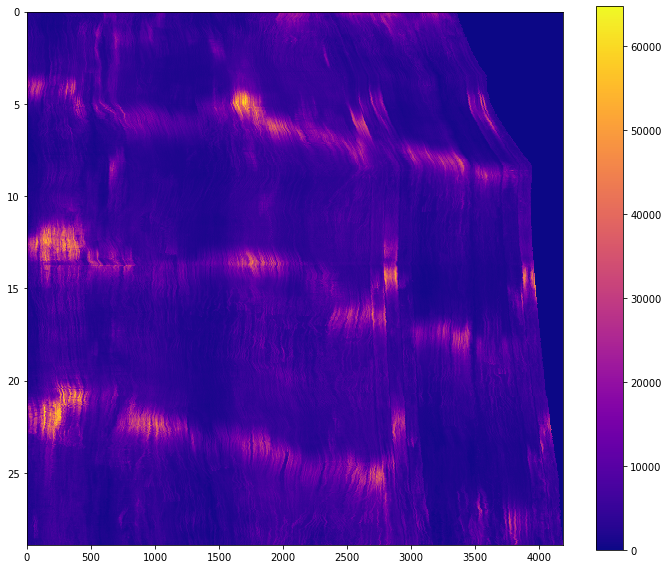

In [4]:
imarray = np.array(im) 
T, Lx = imarray.shape
print(Lx, T)
fig = plt.figure(figsize=(12, 10))
plt.imshow(imarray, interpolation='none', cmap='plasma', aspect=24*6, extent=[0, Lx*1.59, T/3/24, 0])
plt.colorbar() 
plt.show() 

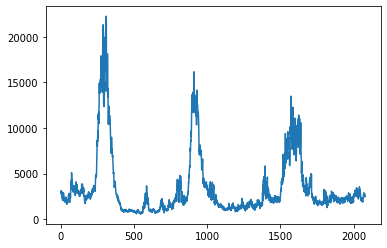

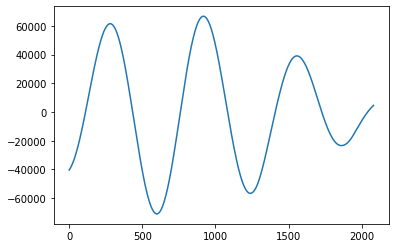

In [78]:
plt.plot(imarray[:, 0])
plt.show() 

# pick a widths such the second curve has a similar period to the first width
# this estimate doesn't need to be very good. The transformation is consistent for pretty large range of widths 
widths = [500]
cwtmatr = signal.cwt(imarray[:, 0], signal.morlet2, widths)
plt.plot(cwtmatr[0])
plt.show()

In [73]:
# now process the entire kymograph
angles = [] 
for t in range(Lx): 
    cwtmatr = signal.cwt(imarray[:, t], signal.morlet2, widths)
    angles.append(np.angle(cwtmatr[0]))

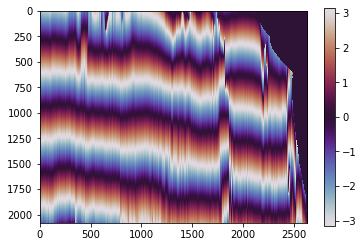

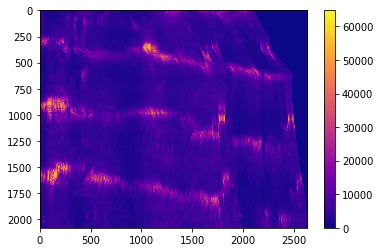

In [80]:
# plot the angle and the intensity together 
plt.imshow(np.array(angles).T * (imarray>10) , cmap='twilight', interpolation='None')
plt.colorbar() 
plt.show()

plt.imshow(imarray, interpolation='none', cmap='plasma', aspect='auto')
plt.colorbar() 
plt.show() 

In [8]:
im = Image.open('data/kymograph_vivo.tif')

print(im.format, im.size, im.mode)

TIFF (1200, 347) F


1200 347


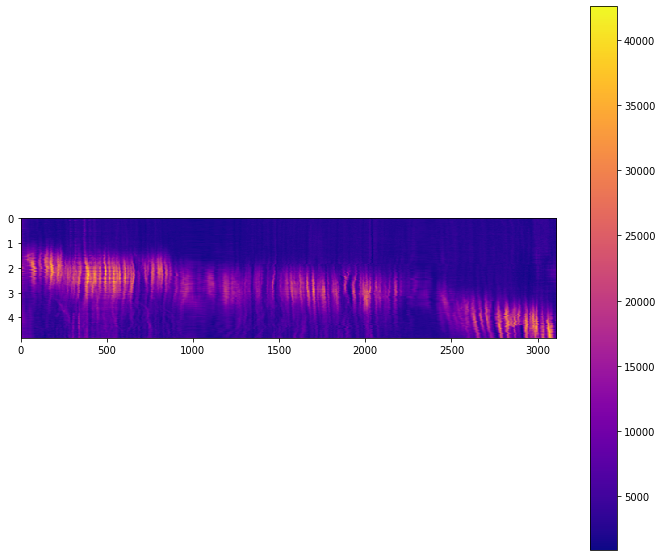

In [10]:
imarray = np.array(im) 
T, Lx = imarray.shape
print(Lx, T)
fig = plt.figure(figsize=(12, 10))
plt.imshow(imarray, interpolation='none', cmap='plasma', aspect=24*6, extent=[0, Lx*2.59, T/3/24, 0])
plt.colorbar() 
plt.show() 